# 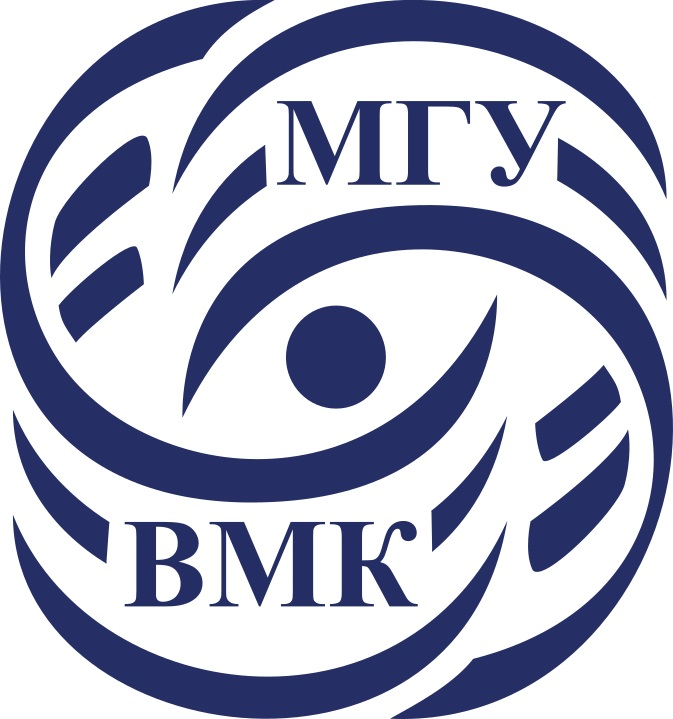

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Линейные модели: регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 7 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 288kB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.3/325.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Проверим версию библиотеки:

In [1]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

В модели линейной регрессии с $l_2$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \frac{\alpha}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right) \rightarrow \min_{w_1, \dots, w_n, b}$

В модели линейной регрессии с $l_1$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot \left( |w_1| + \dots + |w_n| \right) \rightarrow \min_{w_1, \dots, w_n, b}$

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции. Возможно вам также поможет картика из базовой части

<font color='MediumOrchid'>**Ваши выводы тут:**</font>
Линейная модель несмещенная, поэтому регуляризировать свободный член b не стоит. Он отвечает за сдвиг функции регрессии относительно начала координат. Регуляризация влияет на величины коэффициентов, связанных с признаками, чтобы уменьшить их значения и предотвратить переобучение. Однако регуляризация свободного члена бессмысленна, т.к. она не уменьшает сложность модели и не контролирует степень влияния признаков на предсказание.

-----
<font color="white" style="opacity:0.2023"></font>

Рассмотрим модель линейной регрессии с $l_2$ регуляризацией. В sklearn эта модель реализована посредством класса Ridge. В нём есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Сгенерируем случайные данные. Пусть $x$ будет обычным числом из равномерного распределения, а $𝑦=0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$. Добавим в данные к переменной $x$ её же умноженную на $3$. То есть, теперь у нас два признака $x_1$ и $x_2 = 3 \cdot x_1$.

Поскольку  $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{6} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. То, как мы могли убедиться в базовой части, без регуляризации есть риск выучить очень большие веса.

Посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [3]:
from sklearn.linear_model import Ridge

In [4]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

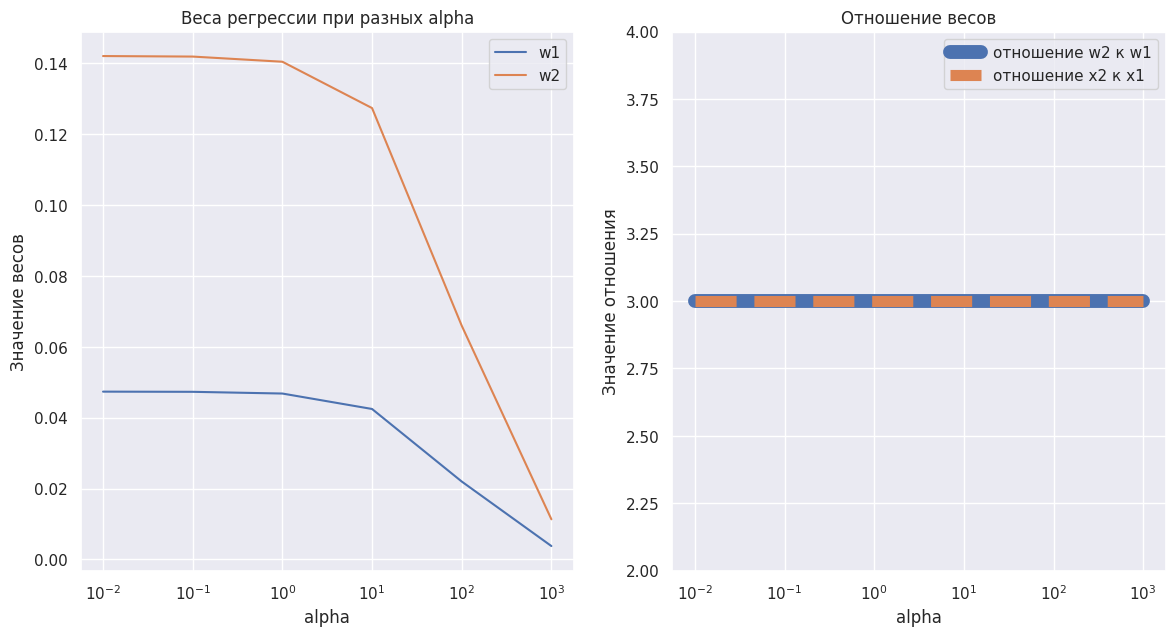

In [5]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Записываем функцию потерь:
$||Xw-y||_2^2+\lambda||w||_2^2\rightarrow\underset{w}{\min}$

Выписываем производныые по каждому весу и приравниваем к 0:
$\frac{dL}{dw_i} = -2(y-w_0-w_1x_1-w_2x_2)x_i+2λw_i = 0 $

Поскольку регуляризация добавляет одинаковое ограничение для всех весов, отношение весов, связанных с л/з признаками, остается постоянным:
$\frac{x_1}{x_2} = \frac{w_1}{w_2} = const$

Регуляризация изменяет величины весов пропорционально, минимизируя их значения, но не влияет на их соотношение, т.к. для линейной комбинации л/з признаков изменение одного коэффициента компенсируется изменением другого





-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### <font color='DarkOrange'>**Задание 3 [2 баллa]**</font>

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Рассмотрим случай двух переменных. При этом при L1-регуляризации есть разрыв в нуле из-за недифференцируемости модуля:
$\frac{dL}{dw_i} = -2(y-w_0-w_1x_1-w_2x_2)x_i+\lambda sign(w_i) = 0 $

Из-за наличия функции знака в производной для весов с малыми значениями оптимизация приводит к занулению этих весов, ибо градиент сдвигает их к нулю для минимизации функции потерь. L1-регуляризация способствует занулению менее значимых весов, что делает модель разреженной и исключает незначимые признаки. Так,

$\lambda(sign(w_2) - c sign(w_1))=0$ => разреживание весов

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [6]:
from sklearn.linear_model import Lasso

In [16]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.029684463509327023

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.14506160917248503

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1565993237388008

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1577530951954324

Веса, при alpha = 0.00001
w1: 0.3966873199145481 	w2: 0.025639365702912847



### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

<font color='LightSteelBlue'>**Подсказка**</font>

 Обратите внимание на то, каким странным получился вес $w_2$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Рассмотрим несколько возможных причин.

Во-первых, когда α мало, регуляризация слабо воздействует на веса, поэтому они остаются близкими к значениям, полученным без регуляризации. Соответствующий код дан ниже.

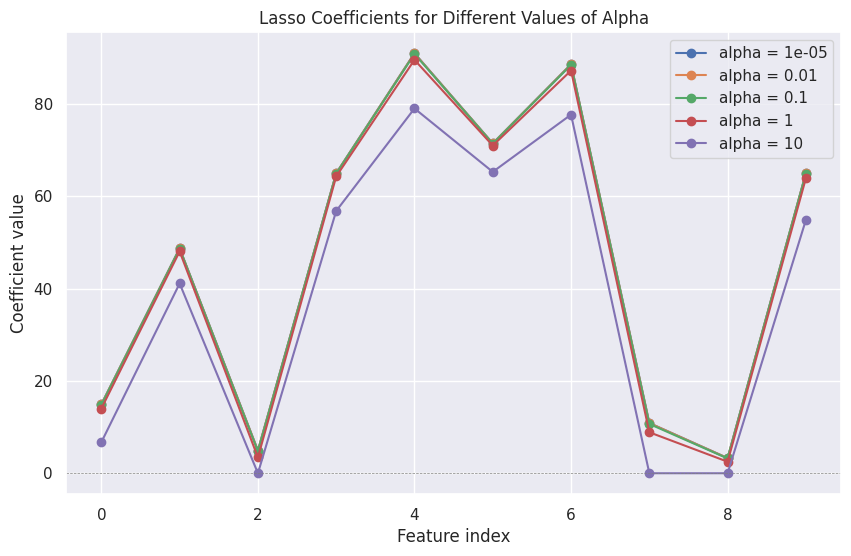

In [22]:
# чем больше alpha, тем сильнее разреживание:
alphas = [0.00001, 0.01, 0.1, 1, 10]
weights = []
# здесь обучение Lasso с разными значениями alpha + сбор коэффициентов
for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=1000, random_state=42)
    model.fit(X, y)
    weights.append(model.coef_)
#визуализация: с увеличением alpha некоторые коэффициенты станут = 0,
#ибо модель выбирает только наиболее важные признаки
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alphas):
    plt.plot(weights[i], label=f'alpha = {alpha}', marker='o')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Lasso Coefficients for Different Values of Alpha')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Во-вторых, регуляризация может не успевать сжать веса до нуля при малом количестве итераций. В коде ниже кол-во итераций увеличено до 10000, и, как можно увидеть, веса стали похожи на те, что были при увеличенных alpha.

Помимо этого, Lasso может не полностью игнорирвать признак w2, видя в нем некоторую значимость.

In [23]:
reg = Lasso(alpha=0.00001, max_iter=10000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

Веса, при alpha = 0.00001
w1: 0.0 	w2: 0.15786847234109577


-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### <font color='DarkOrange'>**Задание 5 [1 баллa]**</font>

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

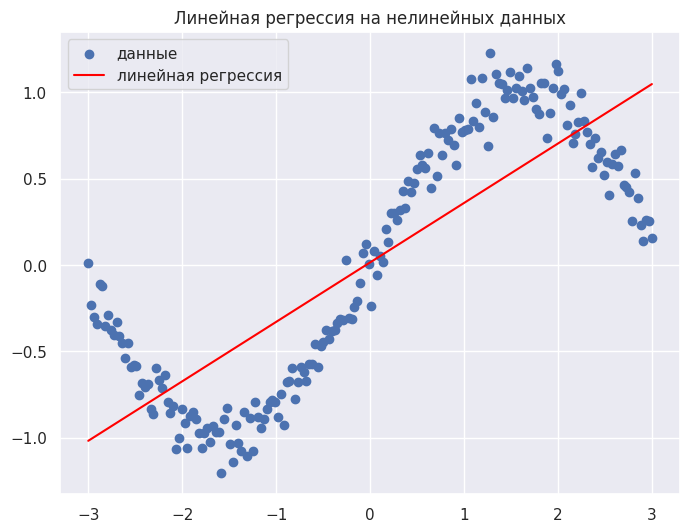

In [28]:
from sklearn.linear_model import LinearRegression

#данные с НЕлинейной зависимостью
X5 = np.linspace(-3, 3, 200).reshape(-1, 1)
y5 = np.sin(X5) + np.random.randn(200, 1) * 0.1

#линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X5, y5)
y_pred = lin_reg.predict(X5)

#визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X5, y5, label="данные")
plt.plot(X5, y_pred, color="red", label="линейная регрессия")
plt.legend()
plt.title("Линейная регрессия на нелинейных данных")
plt.show()

### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>

Приведите искусственный пример (можно даже очень неправдоподобный), когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак? Покажите (теоретически или программно), что признак действительно зануляется


In [41]:
# один из признаков имеет совсем малую дисперсию
X6 = np.hstack((np.random.rand(100, 1), np.full((100, 1), 1e-6)))
#целевая переменная y6 зависит только от 1го признака (с к-ф 3) и случайной ошибки
#(шум) для реалистичности. Второй признак никак не влияет на y6.
y6 = X6[:, 0] * 3 + np.random.randn(100)*0.1
#применение ридж-регрессии с высокой регуляризацией:
#чем выше α, тем сильнее модель стремится уменьшить веса, особенно для
#признаков, которые меньше всего помогают предсказывать y
ridge = Ridge(alpha=100)
ridge.fit(X6, y6)
#вывод весов
print("Веса модели при высокой регуляризации:")
print("w1:", ridge.coef_[0])  #основной признак
print("w2:", ridge.coef_[1])  #признак с малой дисперсией (практически занулен)

Веса модели при высокой регуляризации:
w1: 0.21700362452286784
w2: 4.113884842105588e-37


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

L2-регуляризация зануляет признаки с очень малой дисперсией, т.е. которые имеют очень похожие значения для всех наблюдений (и л/з признаки). Ридж-регрессия, стремясь к упрощению модели, уменьшает вес такого признака почти до нуля, что и видно из результатов выполнения кода. Остальные пояснения даны в коде в комментариях! ☝🐱

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.


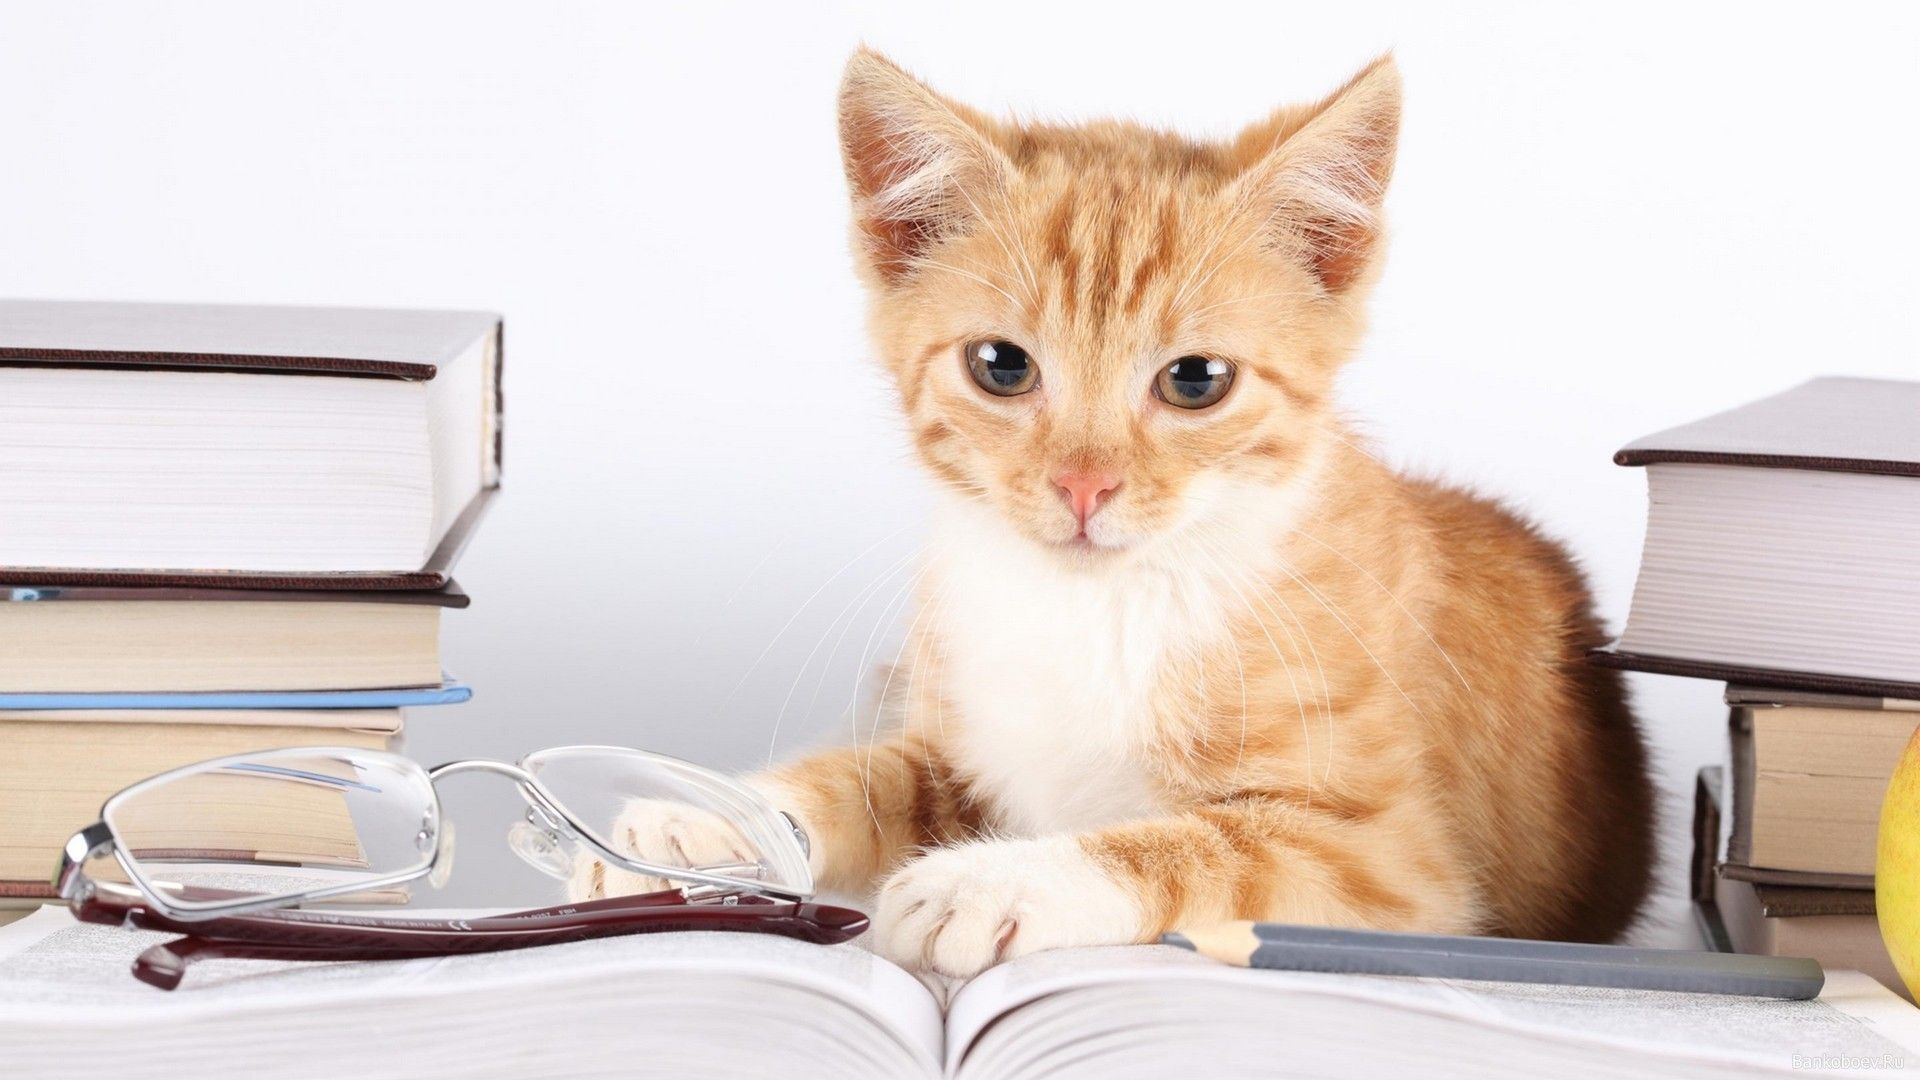